# Sequence Lenght = 10, Codeword Length = 15, p(BSC parameter) ∈ {0.01, 0.05, 0.1, 0.2}

In [3]:
import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
print(os.listdir("/kaggle/input/bsc-0-01-15-seq-len"))

['bsc_p0.40_codewords1.csv', 'bsc_p0.20_codewords2.csv', 'bsc_p0.01_codewords1.csv', 'bsc_p0.05_codewords1.csv', 'bsc_p0.01_codewords2.csv', 'bsc_p0.30_codewords1.csv', 'bsc_p0.10_codewords1.csv', 'bsc_p0.20_codewords1.csv', 'bsc_p0.10_codewords2.csv', 'bsc_p0.30_codewords2.csv', 'bsc_p0.40_codewords2.csv', 'bsc_p0.05_codewords2.csv']


### p=0.01

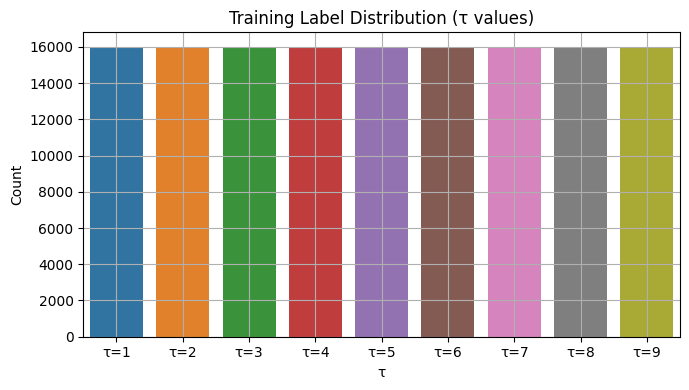

Training Epochs:   2%|▏         | 1/50 [00:13<10:47, 13.22s/it]

Epoch  1 | Train Loss: 2.2000 | Val Accuracy: 0.1189


Training Epochs:   4%|▍         | 2/50 [00:26<10:37, 13.29s/it]

Epoch  2 | Train Loss: 2.1632 | Val Accuracy: 0.2673


Training Epochs:   6%|▌         | 3/50 [00:39<10:26, 13.32s/it]

Epoch  3 | Train Loss: 1.5415 | Val Accuracy: 0.5028


Training Epochs:   8%|▊         | 4/50 [00:53<10:13, 13.34s/it]

Epoch  4 | Train Loss: 1.1917 | Val Accuracy: 0.6301


Training Epochs:  10%|█         | 5/50 [01:06<10:00, 13.33s/it]

Epoch  5 | Train Loss: 1.0155 | Val Accuracy: 0.6999


Training Epochs:  12%|█▏        | 6/50 [01:19<09:46, 13.34s/it]

Epoch  6 | Train Loss: 0.8878 | Val Accuracy: 0.7654


Training Epochs:  14%|█▍        | 7/50 [01:33<09:33, 13.33s/it]

Epoch  7 | Train Loss: 0.7828 | Val Accuracy: 0.8055


Training Epochs:  16%|█▌        | 8/50 [01:46<09:20, 13.34s/it]

Epoch  8 | Train Loss: 0.6887 | Val Accuracy: 0.8483


Training Epochs:  18%|█▊        | 9/50 [02:00<09:07, 13.36s/it]

Epoch  9 | Train Loss: 0.6076 | Val Accuracy: 0.8752


Training Epochs:  20%|██        | 10/50 [02:13<08:54, 13.37s/it]

Epoch 10 | Train Loss: 0.5356 | Val Accuracy: 0.8971


Training Epochs:  22%|██▏       | 11/50 [02:26<08:40, 13.34s/it]

Epoch 11 | Train Loss: 0.4747 | Val Accuracy: 0.9112


Training Epochs:  24%|██▍       | 12/50 [02:39<08:26, 13.32s/it]

Epoch 12 | Train Loss: 0.4264 | Val Accuracy: 0.9231


Training Epochs:  26%|██▌       | 13/50 [02:53<08:12, 13.31s/it]

Epoch 13 | Train Loss: 0.3863 | Val Accuracy: 0.9323


Training Epochs:  28%|██▊       | 14/50 [03:06<07:58, 13.30s/it]

Epoch 14 | Train Loss: 0.3493 | Val Accuracy: 0.9424


Training Epochs:  30%|███       | 15/50 [03:19<07:45, 13.29s/it]

Epoch 15 | Train Loss: 0.3216 | Val Accuracy: 0.9473


Training Epochs:  32%|███▏      | 16/50 [03:33<07:31, 13.28s/it]

Epoch 16 | Train Loss: 0.2981 | Val Accuracy: 0.9518


Training Epochs:  34%|███▍      | 17/50 [03:46<07:19, 13.31s/it]

Epoch 17 | Train Loss: 0.2783 | Val Accuracy: 0.9553


Training Epochs:  36%|███▌      | 18/50 [03:59<07:05, 13.30s/it]

Epoch 18 | Train Loss: 0.2620 | Val Accuracy: 0.9561


Training Epochs:  38%|███▊      | 19/50 [04:12<06:50, 13.26s/it]

Epoch 19 | Train Loss: 0.2486 | Val Accuracy: 0.9586


Training Epochs:  40%|████      | 20/50 [04:26<06:38, 13.27s/it]

Epoch 20 | Train Loss: 0.2376 | Val Accuracy: 0.9596


Training Epochs:  42%|████▏     | 21/50 [04:39<06:25, 13.30s/it]

Epoch 21 | Train Loss: 0.2251 | Val Accuracy: 0.9623


Training Epochs:  44%|████▍     | 22/50 [04:53<06:13, 13.35s/it]

Epoch 22 | Train Loss: 0.2166 | Val Accuracy: 0.9637


Training Epochs:  46%|████▌     | 23/50 [05:06<06:01, 13.38s/it]

Epoch 23 | Train Loss: 0.2112 | Val Accuracy: 0.9631


Training Epochs:  48%|████▊     | 24/50 [05:19<05:47, 13.35s/it]

Epoch 24 | Train Loss: 0.2011 | Val Accuracy: 0.9644


Training Epochs:  50%|█████     | 25/50 [05:33<05:34, 13.37s/it]

Epoch 25 | Train Loss: 0.1947 | Val Accuracy: 0.9666


Training Epochs:  52%|█████▏    | 26/50 [05:46<05:21, 13.38s/it]

Epoch 26 | Train Loss: 0.1901 | Val Accuracy: 0.9656


Training Epochs:  54%|█████▍    | 27/50 [05:59<05:07, 13.39s/it]

Epoch 27 | Train Loss: 0.1854 | Val Accuracy: 0.9659


Training Epochs:  56%|█████▌    | 28/50 [06:13<04:53, 13.36s/it]

Epoch 28 | Train Loss: 0.1813 | Val Accuracy: 0.9669


Training Epochs:  56%|█████▌    | 28/50 [06:26<05:03, 13.81s/it]

Epoch 29 | Train Loss: 0.1774 | Val Accuracy: 0.9660
Early stopping triggered.



Final Test Accuracy: 0.9650



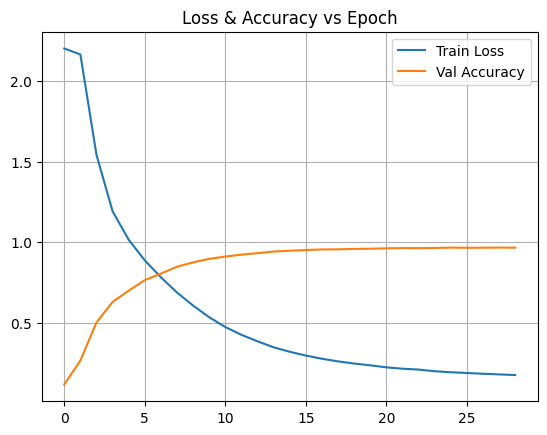

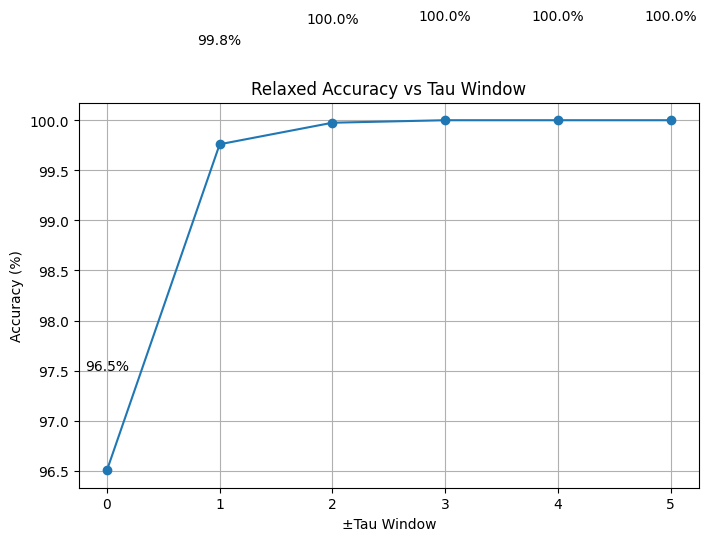

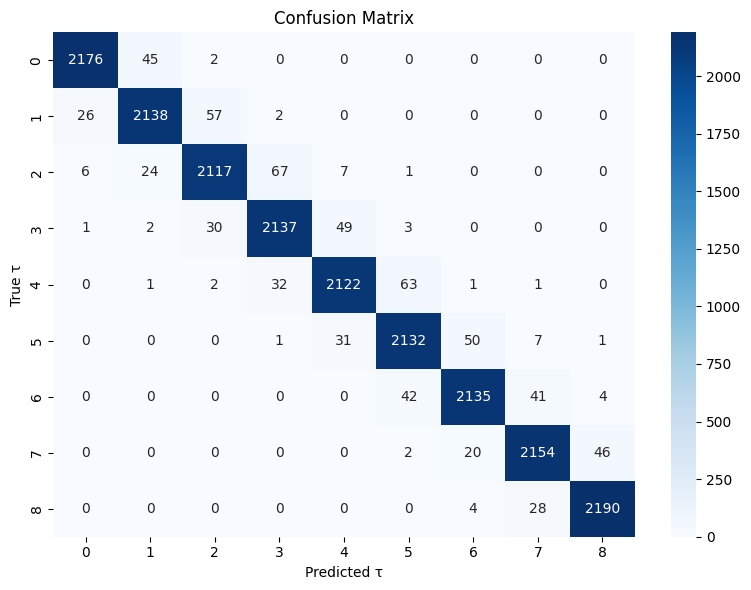

In [11]:
# ========== Configuration ==========
SEED = 0
T = 10  # Sequence length = number of codewords per sample
NUM_CLASSES = T - 1
N_TRAIN = 9*20000
N_TEST = 20000
BATCH_SIZE = 64  # Batch size for training
PATIENCE = 4   # Early Stopping Patience
VAL_DELTA = 0.002  # Minimum required improvement in val accuracy (0.2%) to reset patience
LEARNING_RATE = 1e-4 # Initial learning rate for Adam (scheduler may reduce it later)
MAX_EPOCHS = 50  # Max number of epochs

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.01_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.01_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Generate CPD Dataset ==========
def generate_data_cpd(N, csv1_data, csv2_data, T):
    Data, Labels = [], []
    samples_per_tau = N // (T - 1)
    for tau in range(1, T):
        for _ in range(samples_per_tau):
            idx1 = np.random.choice(len(csv1_data), tau, replace=True)
            idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
            data_point = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(data_point)
            Labels.append(tau - 1)
    return np.array(Data), np.array(Labels)

X, y = generate_data_cpd(N_TRAIN + N_TEST, csv1, csv2, T)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=N_TEST, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)

# ========== Plot: Label Distribution ==========
plt.figure(figsize=(7, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("τ")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=[f"τ={i+1}" for i in range(NUM_CLASSES)])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

# ========== Plots ==========
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("±Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted τ")
plt.ylabel("True τ")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 10, p = 0.01, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)*** 
<pre>For N'(training samples/class) = 1000    Accuracy = 10.6, 30.7, 47.5, 63.6, 74.7
For N'(training samples/class) = 4000     Accuracy =  84.8, 98.9, 99.8, 100, 100
For N'(training samples/class) = 5000     Accuracy = 90.4, 99.4, 99.9, 100, 100
For N'(training samples/class) = 6000     Accuracy = 92.2, 99.5, 99.9, 100, 100 
For N'(training samples/class) = 7000     Accuracy = 93.4, 99.4, 99.9, 100, 100
For N'(training samples/class) = 8000     Accuracy = 94.4, 99.6, 100, 100, 100
For N'(training samples/class) = 9000     Accuracy = 96.2, 99.6, 100, 100, 100 
For N'(training samples/class) = 10000     Accuracy = 95.7, 99.5, 99.9, 100, 100  
For N'(training samples/class) = 12000     Accuracy = 96.4, 99.8, 100, 100, 100
For N'(training samples/class) = 14000      Accuracy = 96.5, 99.7, 100, 100, 100
For N'(training samples/class) = 16000      Accuracy = 96.5, 99.8, 100, 100, 100 <pre>

### p=0.05


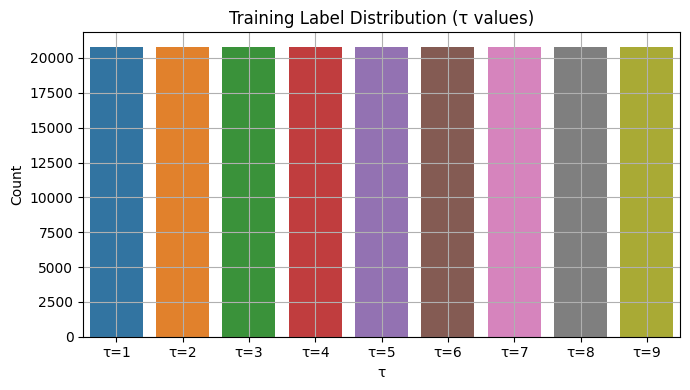

Training Epochs:   2%|▏         | 1/50 [00:17<13:54, 17.03s/it]

Epoch  1 | Train Loss: 2.1999 | Val Accuracy: 0.1142


Training Epochs:   4%|▍         | 2/50 [00:34<13:41, 17.11s/it]

Epoch  2 | Train Loss: 2.1964 | Val Accuracy: 0.1270


Training Epochs:   6%|▌         | 3/50 [00:51<13:22, 17.08s/it]

Epoch  3 | Train Loss: 1.9869 | Val Accuracy: 0.3106


Training Epochs:   8%|▊         | 4/50 [01:08<13:06, 17.11s/it]

Epoch  4 | Train Loss: 1.5803 | Val Accuracy: 0.4419


Training Epochs:  10%|█         | 5/50 [01:25<12:50, 17.13s/it]

Epoch  5 | Train Loss: 1.3828 | Val Accuracy: 0.5073


Training Epochs:  12%|█▏        | 6/50 [01:42<12:33, 17.13s/it]

Epoch  6 | Train Loss: 1.2561 | Val Accuracy: 0.5680


Training Epochs:  14%|█▍        | 7/50 [01:59<12:15, 17.11s/it]

Epoch  7 | Train Loss: 1.1582 | Val Accuracy: 0.6210


Training Epochs:  16%|█▌        | 8/50 [02:16<11:58, 17.11s/it]

Epoch  8 | Train Loss: 1.0706 | Val Accuracy: 0.6604


Training Epochs:  18%|█▊        | 9/50 [02:33<11:41, 17.10s/it]

Epoch  9 | Train Loss: 0.9948 | Val Accuracy: 0.7024


Training Epochs:  20%|██        | 10/50 [02:51<11:25, 17.14s/it]

Epoch 10 | Train Loss: 0.9230 | Val Accuracy: 0.7353


Training Epochs:  22%|██▏       | 11/50 [03:08<11:09, 17.16s/it]

Epoch 11 | Train Loss: 0.8648 | Val Accuracy: 0.7602


Training Epochs:  24%|██▍       | 12/50 [03:25<10:51, 17.16s/it]

Epoch 12 | Train Loss: 0.8119 | Val Accuracy: 0.7809


Training Epochs:  26%|██▌       | 13/50 [03:42<10:34, 17.16s/it]

Epoch 13 | Train Loss: 0.7639 | Val Accuracy: 0.7910


Training Epochs:  28%|██▊       | 14/50 [03:59<10:17, 17.16s/it]

Epoch 14 | Train Loss: 0.7256 | Val Accuracy: 0.8064


Training Epochs:  30%|███       | 15/50 [04:16<10:00, 17.15s/it]

Epoch 15 | Train Loss: 0.6961 | Val Accuracy: 0.8147


Training Epochs:  32%|███▏      | 16/50 [04:34<09:45, 17.21s/it]

Epoch 16 | Train Loss: 0.6673 | Val Accuracy: 0.8231


Training Epochs:  34%|███▍      | 17/50 [04:51<09:26, 17.16s/it]

Epoch 17 | Train Loss: 0.6424 | Val Accuracy: 0.8254


Training Epochs:  36%|███▌      | 18/50 [05:08<09:09, 17.18s/it]

Epoch 18 | Train Loss: 0.6194 | Val Accuracy: 0.8326


Training Epochs:  38%|███▊      | 19/50 [05:25<08:53, 17.22s/it]

Epoch 19 | Train Loss: 0.6013 | Val Accuracy: 0.8381


Training Epochs:  40%|████      | 20/50 [05:43<08:36, 17.20s/it]

Epoch 20 | Train Loss: 0.5859 | Val Accuracy: 0.8392


Training Epochs:  42%|████▏     | 21/50 [06:00<08:19, 17.22s/it]

Epoch 21 | Train Loss: 0.5727 | Val Accuracy: 0.8424


Training Epochs:  44%|████▍     | 22/50 [06:17<08:05, 17.33s/it]

Epoch 22 | Train Loss: 0.5620 | Val Accuracy: 0.8461


Training Epochs:  46%|████▌     | 23/50 [06:35<07:48, 17.35s/it]

Epoch 23 | Train Loss: 0.5512 | Val Accuracy: 0.8461


Training Epochs:  48%|████▊     | 24/50 [06:52<07:31, 17.36s/it]

Epoch 24 | Train Loss: 0.5405 | Val Accuracy: 0.8488


Training Epochs:  50%|█████     | 25/50 [07:10<07:14, 17.37s/it]

Epoch 25 | Train Loss: 0.5274 | Val Accuracy: 0.8524


Training Epochs:  52%|█████▏    | 26/50 [07:27<06:56, 17.35s/it]

Epoch 26 | Train Loss: 0.5218 | Val Accuracy: 0.8527


Training Epochs:  54%|█████▍    | 27/50 [07:44<06:38, 17.31s/it]

Epoch 27 | Train Loss: 0.5152 | Val Accuracy: 0.8544


Training Epochs:  56%|█████▌    | 28/50 [08:02<06:21, 17.33s/it]

Epoch 28 | Train Loss: 0.5049 | Val Accuracy: 0.8576


Training Epochs:  58%|█████▊    | 29/50 [08:19<06:04, 17.37s/it]

Epoch 29 | Train Loss: 0.4988 | Val Accuracy: 0.8552


Training Epochs:  60%|██████    | 30/50 [08:36<05:48, 17.41s/it]

Epoch 30 | Train Loss: 0.4941 | Val Accuracy: 0.8597


Training Epochs:  62%|██████▏   | 31/50 [08:54<05:30, 17.41s/it]

Epoch 31 | Train Loss: 0.4874 | Val Accuracy: 0.8588


Training Epochs:  64%|██████▍   | 32/50 [09:11<05:13, 17.44s/it]

Epoch 32 | Train Loss: 0.4808 | Val Accuracy: 0.8557


Training Epochs:  66%|██████▌   | 33/50 [09:29<04:55, 17.39s/it]

Epoch 33 | Train Loss: 0.4773 | Val Accuracy: 0.8612


Training Epochs:  66%|██████▌   | 33/50 [09:46<05:02, 17.77s/it]

Epoch 34 | Train Loss: 0.4713 | Val Accuracy: 0.8599
Early stopping triggered.



Final Test Accuracy: 0.8604



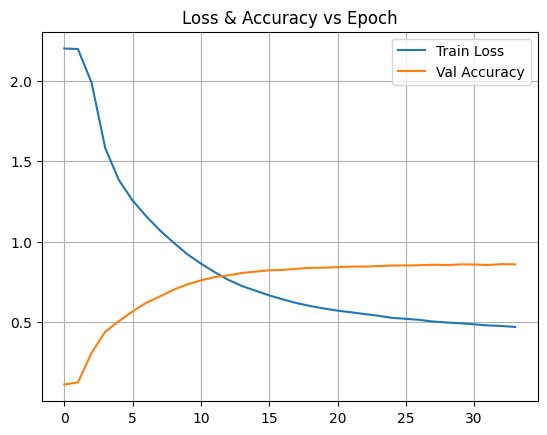

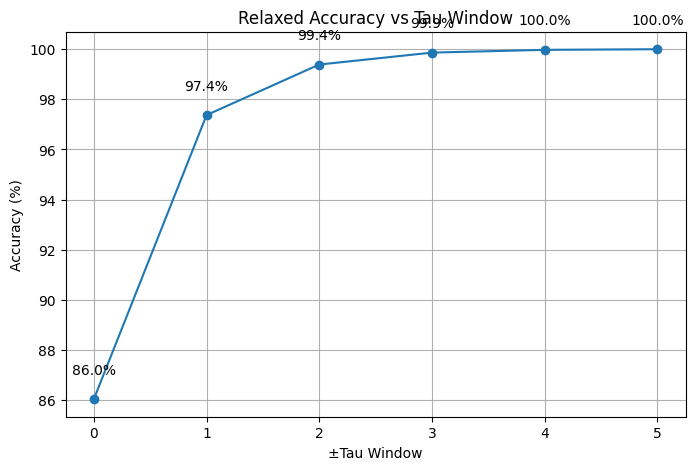

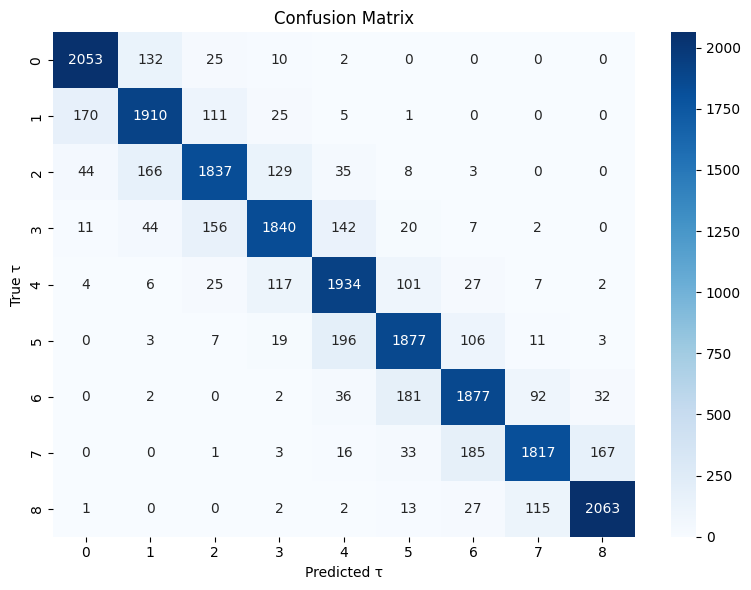

In [17]:
# ========== Configuration ==========
SEED = 0
T = 10  # Sequence length = number of codewords per sample
NUM_CLASSES = T - 1
N_TRAIN = 9*26000
N_TEST = 20000
BATCH_SIZE = 64  # Batch size for training
PATIENCE = 4   # Early Stopping Patience
VAL_DELTA = 0.002  # Minimum required improvement in val accuracy (0.2%) to reset patience
LEARNING_RATE = 1e-4 # Initial learning rate for Adam (scheduler may reduce it later)
MAX_EPOCHS = 50  # Max number of epochs

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.05_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.05_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Generate CPD Dataset ==========
def generate_data_cpd(N, csv1_data, csv2_data, T):
    Data, Labels = [], []
    samples_per_tau = N // (T - 1)
    for tau in range(1, T):
        for _ in range(samples_per_tau):
            idx1 = np.random.choice(len(csv1_data), tau, replace=True)
            idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
            data_point = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(data_point)
            Labels.append(tau - 1)
    return np.array(Data), np.array(Labels)

X, y = generate_data_cpd(N_TRAIN + N_TEST, csv1, csv2, T)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=N_TEST, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)

# ========== Plot: Label Distribution ==========
plt.figure(figsize=(7, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("τ")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=[f"τ={i+1}" for i in range(NUM_CLASSES)])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

# ========== Plots ==========
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("±Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted τ")
plt.ylabel("True τ")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 10, p = 0.05, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>For N'(training samples/class) = 1000     Accuracy = 12.0, 31.5, 45.5, 62.0, 79.5
For N'(training samples/class) = 4000     Accuracy = 54.0, 92.5, 99.0, 99.5, 100 
For N'(training samples/class) = 5000     Accuracy = 71.4, 95.1, 98.1, 99.3, 99.9
For N'(training samples/class) = 6000     Accuracy = sim
For N'(training samples/class) = 8000     Accuracy = 81.3, 96.8, 99.1, 99.8, 100
For N'(training samples/class) = 10000     Accuracy = sim
For N'(training samples/class) = 11000     Accuracy = 83.3, 96.9, 99.2, 99.8, 100
For N'(training samples/class) = 16000     Accuracy = 85.7, 97.2, 99.4, 99.9, 100 
For N'(training samples/class) = 17000     Accuracy = sim 
For N'(training samples/class) = 20000     Accuracy = 86.0, 97.4, 
For N'(training samples/class) = 24000     Accuracy = 87.4, 97.9, 99.9, 100 
For N'(training samples/class) = 35000     Accuracy = 87.4, 97.7, 99.5, 100</pre>

### p=0.1

In [ ]:
# ========== Configuration ==========
SEED = 0
T = 10  # Sequence length = number of codewords per sample
NUM_CLASSES = T - 1
N_TRAIN = 9*26000
N_TEST = 20000
BATCH_SIZE = 64  # Batch size for training
PATIENCE = 4   # Early Stopping Patience
VAL_DELTA = 0.002  # Minimum required improvement in val accuracy (0.2%) to reset patience
LEARNING_RATE = 1e-4 # Initial learning rate for Adam (scheduler may reduce it later)
MAX_EPOCHS = 50  # Max number of epochs

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.10_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-0-01-15-seq-len/bsc_p0.10_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Generate CPD Dataset ==========
def generate_data_cpd(N, csv1_data, csv2_data, T):
    Data, Labels = [], []
    samples_per_tau = N // (T - 1)
    for tau in range(1, T):
        for _ in range(samples_per_tau):
            idx1 = np.random.choice(len(csv1_data), tau, replace=True)
            idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
            data_point = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(data_point)
            Labels.append(tau - 1)
    return np.array(Data), np.array(Labels)

X, y = generate_data_cpd(N_TRAIN + N_TEST, csv1, csv2, T)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=N_TEST, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)

# ========== Plot: Label Distribution ==========
plt.figure(figsize=(7, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("τ")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=[f"τ={i+1}" for i in range(NUM_CLASSES)])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

# ========== Plots ==========
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("±Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted τ")
plt.ylabel("True τ")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 10, p = 0.10, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
For N'(training samples/class) = 200      Accuracy = </br>
For N'(training samples/class) = 2000      Accuracy =  </br>
For N'(training samples/class) = 4000      Accuracy =  </br>
For N'(training samples/class) = 6000      Accuracy =  </br>
For N'(training samples/class) = 8000      Accuracy =  </br>
For N'(training samples/class) = 10000      Accuracy =  </br>
For N'(training samples/class) = 15000      Accuracy =  </br>
For N'(training samples/class) = 20000      Accuracy =  </br>
For N'(training samples/class) = 25000      Accuracy =  </br>
For N'(training samples/class) = 30000      Accuracy =  </br>
For N'(training samples/class) = 35000      Accuracy =  </br>
For N'(training samples/class) = 40000      Accuracy =  </br>
For N'(training samples/class) = 50000      Accuracy =  </br>
For N'(training samples/class) = 60000      Accuracy =  </br>
For N'(training samples/class) = 70000      Accuracy =  </br>
For N'(training samples/class) = 80000      Accuracy =  </br>

### p=0.2

***T = 10, p = 0.20, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
For N'(training samples/class) = 200      Accuracy = </br>
For N'(training samples/class) = 2000      Accuracy =  </br>
For N'(training samples/class) = 4000      Accuracy =  </br>
For N'(training samples/class) = 6000      Accuracy =  </br>
For N'(training samples/class) = 8000      Accuracy =  </br>
For N'(training samples/class) = 10000      Accuracy =  </br>
For N'(training samples/class) = 15000      Accuracy =  </br>
For N'(training samples/class) = 20000      Accuracy =  </br>
For N'(training samples/class) = 25000      Accuracy =  </br>
For N'(training samples/class) = 30000      Accuracy =  </br>
For N'(training samples/class) = 35000      Accuracy =  </br>
For N'(training samples/class) = 40000      Accuracy =  </br>
For N'(training samples/class) = 50000      Accuracy =  </br>
For N'(training samples/class) = 60000      Accuracy =  </br>
For N'(training samples/class) = 70000      Accuracy =  </br>
For N'(training samples/class) = 80000      Accuracy =  </br>